
Importing necessary libraries

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [7]:
#Loading the dataset
df = pd.read_csv('Dataset.csv')



Checking for basic information about the dataset

In [8]:
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors  

In [9]:
print("\nDataset Description:")
print(df['Price'].describe())

print("\nFirst few rows of the dataset:")
print(df.head())


Dataset Description:
count     16731
unique     3794
top       29990
freq        252
Name: Price, dtype: object

First few rows of the dataset:
           Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres   ColourExtInt  

Checking for missing values and outliers

In [10]:

print("\nMissing values in each column:")
print(df.isnull().sum())
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price']).copy()
print(df.isnull().sum())
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce')
df['Kilometres'].fillna(df['Kilometres'].median(), inplace=True)




Missing values in each column:
Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64
Brand                   0
Year                    0
Model                   0
Car/Suv                26
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres              0
ColourExtInt            0
Location              449
CylindersinEngine       0
BodyType              279
Doors                1587
Seats              

/var/folders/d3/hb2nq9vx6_xb8lsdl6z49z8c0000gn/T/ipykernel_15887/3650697858.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Kilometres'].fillna(df['Kilometres'].median(), inplace=True)


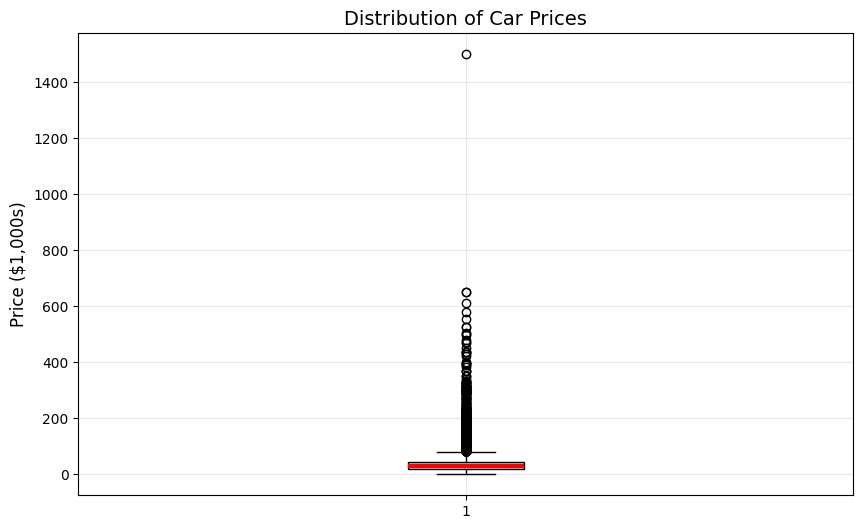

In [11]:

plt.figure(figsize=(10, 6))
price_in_thousands = df['Price'] / 1000
bp = plt.boxplot(price_in_thousands, patch_artist=True)


bp['boxes'][0].set_facecolor('lightblue')
bp['medians'][0].set_color('red')
bp['medians'][0].set_linewidth(3)


plt.title('Distribution of Car Prices', fontsize=14)
plt.ylabel('Price ($1,000s)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

SELECT ONLY USEFUL ONES

In [119]:
df = df[df['Price'] < 150000]

In [25]:

features = ['Brand', 'Year', 'Model', 'Car/Suv', 'UsedOrNew', 
            'Transmission', 'Engine', 'DriveType', 'FuelType', 
            'FuelConsumption', 'Kilometres', 'CylindersinEngine','Location']
target = 'Price'

In [26]:

df_model = df[features + [target]].copy()
df_model.head()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,Location,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595.0,4 cyl,"Caringbah, NSW",51990.0
1,MG,2022.0,MG3,Hatchback,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16.0,4 cyl,"Brookvale, NSW",19990.0
2,BMW,2022.0,430I,Coupe,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472.0,4 cyl,"Sylvania, NSW",108988.0
3,Mercedes-Benz,2011.0,E500,Coupe,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517.0,8 cyl,"Mount Druitt, NSW",32990.0
4,Renault,2022.0,Arkana,SUV,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035.0,4 cyl,"Castle Hill, NSW",34990.0


Handling non-integer features

In [27]:
numerical_features = ['Year', 'Kilometres']
categorical_features = ['Brand', 'Model', 'Car/Suv', 'UsedOrNew', 'FuelConsumption',
                        'Transmission', 'Engine', 'DriveType', 'FuelType']


In [28]:
df_model = df[numerical_features + categorical_features + [target]].copy()

In [29]:
print("\nPrepared DataFrame for Modeling:")
print(df_model.head())
print("\n Data type info:")
print(df_model.dtypes)  


Prepared DataFrame for Modeling:
     Year  Kilometres          Brand   Model               Car/Suv UsedOrNew  \
0  2022.0      5595.0      Ssangyong  Rexton  Sutherland Isuzu Ute      DEMO   
1  2022.0        16.0             MG     MG3             Hatchback      USED   
2  2022.0      8472.0            BMW    430I                 Coupe      USED   
3  2011.0    136517.0  Mercedes-Benz    E500                 Coupe      USED   
4  2022.0      1035.0        Renault  Arkana                   SUV      USED   

  FuelConsumption Transmission        Engine DriveType  FuelType     Price  
0  8.7 L / 100 km    Automatic  4 cyl, 2.2 L       AWD    Diesel   51990.0  
1  6.7 L / 100 km    Automatic  4 cyl, 1.5 L     Front   Premium   19990.0  
2  6.6 L / 100 km    Automatic    4 cyl, 2 L      Rear   Premium  108988.0  
3   11 L / 100 km    Automatic  8 cyl, 5.5 L      Rear   Premium   32990.0  
4    6 L / 100 km    Automatic  4 cyl, 1.3 L     Front  Unleaded   34990.0  

 Data type info:
Year 

In [30]:
df_model = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)


In [31]:
#
df_model.head()

,Year,Kilometres,Price,Brand_Alfa,Brand_Aston,Brand_Audi,Brand_BMW,Brand_BYD,Brand_Bentley,Brand_Caterham,...,DriveType_Other,DriveType_Rear,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_LPG,FuelType_Leaded,FuelType_Other,FuelType_Premium,FuelType_Unleaded
0,2022.0,5595.0,51990.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2022.0,16.0,19990.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2022.0,8472.0,108988.0,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,2011.0,136517.0,32990.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,2022.0,1035.0,34990.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [32]:
print("Data after one-hot encoding:")
print(df_model.columns.tolist())

print("Total columns after encoding:", len(df_model.columns))

Data after one-hot encoding:
['Year', 'Kilometres', 'Price', 'Brand_Alfa', 'Brand_Aston', 'Brand_Audi', 'Brand_BMW', 'Brand_BYD', 'Brand_Bentley', 'Brand_Caterham', 'Brand_Chery', 'Brand_Chevrolet', 'Brand_Chrysler', 'Brand_Citroen', 'Brand_Cupra', 'Brand_Daewoo', 'Brand_Daihatsu', 'Brand_Datsun', 'Brand_Dodge', 'Brand_FPV', 'Brand_Ferrari', 'Brand_Fiat', 'Brand_Ford', 'Brand_Foton', 'Brand_GWM', 'Brand_Geely', 'Brand_Genesis', 'Brand_Great', 'Brand_HSV', 'Brand_Haval', 'Brand_Hino', 'Brand_Holden', 'Brand_Honda', 'Brand_Hummer', 'Brand_Hyundai', 'Brand_Ineos', 'Brand_Infiniti', 'Brand_International', 'Brand_Isuzu', 'Brand_Iveco', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Kia', 'Brand_LDV', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Lexus', 'Brand_Lotus', 'Brand_MG', 'Brand_Mahindra', 'Brand_Maserati', 'Brand_Mazda', 'Brand_McLaren', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Opel', 'Brand_Packard', 'Brand_Peugeot', 'Brand_Polestar', 'Brand_Porsche', 'Bra

 Separate features (X) and target (y)

In [33]:
X = df_model.drop('Price', axis=1)
Y = df_model['Price']

print("Features shape:", X.shape)
print("Target shape:", Y.shape)
print("First few rows of features:", X.head())

Features shape: (16681, 1748)
Target shape: (16681,)
First few rows of features:      Year  Kilometres  Brand_Alfa  Brand_Aston  Brand_Audi  Brand_BMW  \
0  2022.0      5595.0       False        False       False      False   
1  2022.0        16.0       False        False       False      False   
2  2022.0      8472.0       False        False       False       True   
3  2011.0    136517.0       False        False       False      False   
4  2022.0      1035.0       False        False       False      False   

   Brand_BYD  Brand_Bentley  Brand_Caterham  Brand_Chery  ...  \
0      False          False           False        False  ...   
1      False          False           False        False  ...   
2      False          False           False        False  ...   
3      False          False           False        False  ...   
4      False          False           False        False  ...   

   DriveType_Other  DriveType_Rear  FuelType_Diesel  FuelType_Electric  \
0            Fa

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training features shape:", len(X_train))
print("Testing features shape:", len(X_test))

Training features shape: 13344
Testing features shape: 3337


Training the model and making prediction?

In [35]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
print("Model training completed.")


Model training completed.


In [36]:
y_pred = model.predict(X_test)

In [24]:
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("RANDOM FOREST MODEL PERFORMANCE:")

print(f"\nR² Score: {r2:.4f}")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")


RANDOM FOREST MODEL PERFORMANCE:

R² Score: 0.7717
Mean Absolute Error: $5,819.35
Root Mean Squared Error: $17,946.51
